# CVD - KNN Classifier - Period 3

In [1]:
#import dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
#read in data set
df = pd.read_csv("Resources/cvd_period3_data.csv")
df.head(20)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVAP,PREVHYP,HDLC,LDLC,DEATH,CVD
0,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,0,0,54.0,141.0,0,0
1,11263,2,220.0,55,180.0,106.0,0,0.0,31.17,1,1.0,86.0,81.0,0,1,46.0,135.0,0,1
2,12806,2,320.0,57,110.0,46.0,1,30.0,22.02,0,0.0,75.0,87.0,0,0,34.0,286.0,0,0
3,14367,1,280.0,64,168.0,100.0,0,0.0,25.72,0,0.0,92.0,82.0,0,1,44.0,236.0,0,0
4,16365,1,211.0,55,173.0,123.0,0,0.0,29.11,0,1.0,75.0,85.0,0,1,48.0,163.0,0,0
5,23727,2,159.0,53,124.0,78.0,0,0.0,26.62,0,0.0,68.0,135.0,0,1,53.0,106.0,1,0
6,24721,2,264.0,51,141.0,81.0,1,15.0,24.77,0,0.0,85.0,97.0,0,1,58.0,206.0,1,0
7,33077,1,215.0,60,144.5,80.0,1,10.0,22.96,0,0.0,57.0,91.0,0,1,62.0,135.0,0,0
8,34689,2,212.0,49,163.0,96.0,1,10.0,31.45,0,0.0,82.0,84.0,0,1,40.0,172.0,0,0
9,36459,1,162.0,53,152.5,101.0,0,0.0,26.43,0,0.0,105.0,78.0,0,1,31.0,91.0,0,0


In [3]:
cvd_df = df.set_index('RANDID')
#Remove columns not involved in analysis
cvd_df = cvd_df[['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE',
       'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'PREVAP',
       'PREVHYP', 'HDLC', 'LDLC', 'CVD']]
cvd_df.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVAP,PREVHYP,HDLC,LDLC,CVD
RANDID,,,,,,,,,,,,,,,,,
6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,0,0,54.0,141.0,0
11263,2,220.0,55,180.0,106.0,0,0.0,31.17,1,1.0,86.0,81.0,0,1,46.0,135.0,1
12806,2,320.0,57,110.0,46.0,1,30.0,22.02,0,0.0,75.0,87.0,0,0,34.0,286.0,0
14367,1,280.0,64,168.0,100.0,0,0.0,25.72,0,0.0,92.0,82.0,0,1,44.0,236.0,0
16365,1,211.0,55,173.0,123.0,0,0.0,29.11,0,1.0,75.0,85.0,0,1,48.0,163.0,0


In [4]:
y = cvd_df["CVD"]
target_names = ["negative", "positive"]

In [5]:
X = cvd_df.drop("CVD", axis=1)
X.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVAP,PREVHYP,HDLC,LDLC
RANDID,,,,,,,,,,,,,,,,
6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,0,0,54.0,141.0
11263,2,220.0,55,180.0,106.0,0,0.0,31.17,1,1.0,86.0,81.0,0,1,46.0,135.0
12806,2,320.0,57,110.0,46.0,1,30.0,22.02,0,0.0,75.0,87.0,0,0,34.0,286.0
14367,1,280.0,64,168.0,100.0,0,0.0,25.72,0,0.0,92.0,82.0,0,1,44.0,236.0
16365,1,211.0,55,173.0,123.0,0,0.0,29.11,0,1.0,75.0,85.0,0,1,48.0,163.0


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=49)

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [8]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.769
k: 3, Train/Test Score: 0.883/0.822
k: 5, Train/Test Score: 0.859/0.817
k: 7, Train/Test Score: 0.852/0.828
k: 9, Train/Test Score: 0.840/0.838
k: 11, Train/Test Score: 0.839/0.836
k: 13, Train/Test Score: 0.837/0.842
k: 15, Train/Test Score: 0.837/0.846
k: 17, Train/Test Score: 0.835/0.854
k: 19, Train/Test Score: 0.835/0.846
k: 21, Train/Test Score: 0.835/0.848
k: 23, Train/Test Score: 0.833/0.850
k: 25, Train/Test Score: 0.834/0.848
k: 27, Train/Test Score: 0.833/0.846
k: 29, Train/Test Score: 0.832/0.846


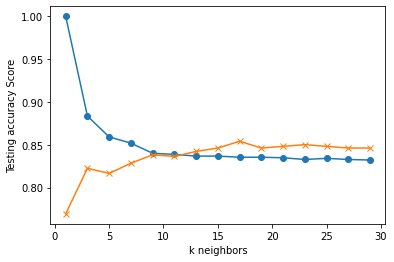

In [12]:
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
# Choose K = 17 from above and re-fit the KNN Classifier using that k value.
# Note that k = 17 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.854


In [14]:
#Make predictions (0 = no event occurred, 1 = event occurred)
predictions = knn.predict(X_test_scaled)
cvd_predictions = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
cvd_predictions

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
502,0,0
503,0,0
504,0,1
505,0,0


In [15]:
p0a0 = cvd_predictions.loc[(cvd_predictions['Prediction']==0) & (cvd_predictions['Actual']==0)]
p1a1 = cvd_predictions.loc[(cvd_predictions['Prediction']==1) & (cvd_predictions['Actual']==1)]
p0a1 = cvd_predictions.loc[(cvd_predictions['Prediction']==0) & (cvd_predictions['Actual']==1)]
p1a0 = cvd_predictions.loc[(cvd_predictions['Prediction']==1) & (cvd_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0:  {len(p0a0)}")
print(f"Event prediction = 1 and actual = 1:  {len(p1a1)}")
print(f"Event prediction = 0 and actual = 1:  {len(p0a1)}")
print(f"Event prediction = 1 and actual = 0:  {len(p1a0)}")

Event prediction = 0 and actual = 0:  427
Event prediction = 1 and actual = 1:  6
Event prediction = 0 and actual = 1:  70
Event prediction = 1 and actual = 0:  4


## Separating by gender

In [16]:
#filter df by gender (males = 1, females = 2)
male_cvd = cvd_df.loc[(cvd_df["SEX"] ==1)]
female_cvd = cvd_df.loc[(cvd_df["SEX"] ==2)]

In [17]:
male_cvd_df = male_cvd.drop('SEX', axis=1)
female_cvd_df = female_cvd.drop('SEX', axis=1)

In [18]:
y_male = male_cvd_df["CVD"]
male_target_names = ["negative", "positive"]

y_female = female_cvd_df["CVD"]
female_target_names = ["negative", "positive"]

In [19]:
X_male = male_cvd_df.drop("CVD", axis=1)
X_female = female_cvd.drop("CVD", axis=1)

In [20]:
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_male, y_male, random_state=49)
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_female, y_female, random_state=49)

In [21]:
# Create a StandardScater model and fit it to the training data - male

X_male_scaler = StandardScaler().fit(X_male_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_male_train_scaled = X_male_scaler.transform(X_male_train)
X_male_test_scaled = X_male_scaler.transform(X_male_test)

In [23]:
m_train_scores = []
m_test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_male_train_scaled, y_male_train)
    train_score = knn.score(X_male_train_scaled, y_male_train)
    test_score = knn.score(X_male_test_scaled, y_male_test)
    m_train_scores.append(train_score)
    m_test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.633
k: 3, Train/Test Score: 0.844/0.690
k: 5, Train/Test Score: 0.792/0.671
k: 7, Train/Test Score: 0.805/0.686
k: 9, Train/Test Score: 0.800/0.695
k: 11, Train/Test Score: 0.790/0.700
k: 13, Train/Test Score: 0.787/0.719
k: 15, Train/Test Score: 0.779/0.714
k: 17, Train/Test Score: 0.773/0.738
k: 19, Train/Test Score: 0.775/0.738
k: 21, Train/Test Score: 0.768/0.743
k: 23, Train/Test Score: 0.773/0.738
k: 25, Train/Test Score: 0.771/0.748
k: 27, Train/Test Score: 0.765/0.733
k: 29, Train/Test Score: 0.767/0.738


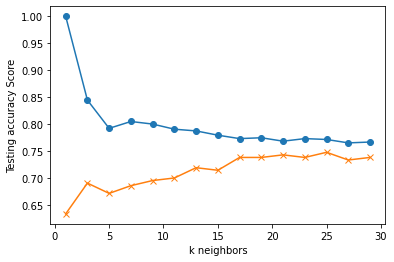

In [24]:
plt.plot(range(1, 30, 2), m_train_scores, marker='o')
plt.plot(range(1, 30, 2), m_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [25]:
# Choose K = 19 from above and re-fit the KNN Classifier using that k value.
# Note that k = 19 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_male_train_scaled, y_male_train)
print('k=19 Test Acc: %.3f' % knn.score(X_male_test_scaled, y_male_test))

k=19 Test Acc: 0.738


In [26]:
#Make predictions (0 = no event occurred, 1 = event occurred)
m_predictions = knn.predict(X_male_test_scaled)
m_cvd_predictions = pd.DataFrame({"Prediction": m_predictions, "Actual": y_male_test}).reset_index(drop=True)
m_cvd_predictions

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
205,0,0
206,0,0
207,0,0
208,0,0


In [27]:
p0a0 = m_cvd_predictions.loc[(m_cvd_predictions['Prediction']==0) & (m_cvd_predictions['Actual']==0)]
p1a1 = m_cvd_predictions.loc[(m_cvd_predictions['Prediction']==1) & (m_cvd_predictions['Actual']==1)]
p0a1 = m_cvd_predictions.loc[(m_cvd_predictions['Prediction']==0) & (m_cvd_predictions['Actual']==1)]
p1a0 = m_cvd_predictions.loc[(m_cvd_predictions['Prediction']==1) & (m_cvd_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0 (male):  {len(p0a0)}")
print(f"Event prediction = 1 and actual = 1 (male):  {len(p1a1)}")
print(f"Event prediction = 0 and actual = 1 (male):  {len(p0a1)}")
print(f"Event prediction = 1 and actual = 0 (male):  {len(p1a0)}")

Event prediction = 0 and actual = 0 (male):  152
Event prediction = 1 and actual = 1 (male):  3
Event prediction = 0 and actual = 1 (male):  51
Event prediction = 1 and actual = 0 (male):  4


In [28]:
# Create a StandardScater model and fit it to the training data - female

X_female_scaler = StandardScaler().fit(X_female_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_female_train_scaled = X_female_scaler.transform(X_female_train)
X_female_test_scaled = X_female_scaler.transform(X_female_test)

In [29]:
f_train_scores = []
f_test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_female_train_scaled, y_female_train)
    train_score = knn.score(X_female_train_scaled, y_female_train)
    test_score = knn.score(X_female_test_scaled, y_female_test)
    f_train_scores.append(train_score)
    f_test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.842
k: 3, Train/Test Score: 0.894/0.882
k: 5, Train/Test Score: 0.894/0.889
k: 7, Train/Test Score: 0.883/0.899
k: 9, Train/Test Score: 0.883/0.902
k: 11, Train/Test Score: 0.883/0.906
k: 13, Train/Test Score: 0.882/0.906
k: 15, Train/Test Score: 0.882/0.906
k: 17, Train/Test Score: 0.883/0.906
k: 19, Train/Test Score: 0.883/0.906
k: 21, Train/Test Score: 0.882/0.906
k: 23, Train/Test Score: 0.882/0.906
k: 25, Train/Test Score: 0.882/0.906
k: 27, Train/Test Score: 0.882/0.906
k: 29, Train/Test Score: 0.882/0.906


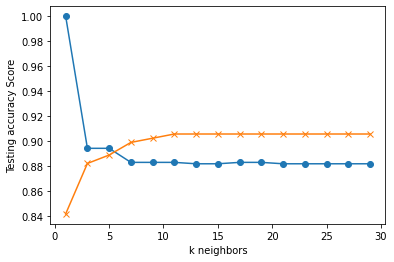

In [30]:
plt.plot(range(1, 30, 2), f_train_scores, marker='o')
plt.plot(range(1, 30, 2), f_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [31]:
# Choose K = 11 from above and re-fit the KNN Classifier using that k value.
# Note that k = 11 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_female_train_scaled, y_female_train)
print('k=11 Test Acc: %.3f' % knn.score(X_female_test_scaled, y_female_test))

k=11 Test Acc: 0.906


In [32]:
#Make predictions (0 = no event occurred, 1 = event occurred)
f_predictions = knn.predict(X_female_test_scaled)
f_cvd_predictions = pd.DataFrame({"Prediction": f_predictions, "Actual": y_female_test}).reset_index(drop=True)
f_cvd_predictions

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
292,0,0
293,0,0
294,1,1
295,0,0


In [33]:
p0a0 = f_cvd_predictions.loc[(f_cvd_predictions['Prediction']==0) & (f_cvd_predictions['Actual']==0)]
p1a1 = f_cvd_predictions.loc[(f_cvd_predictions['Prediction']==1) & (f_cvd_predictions['Actual']==1)]
p0a1 = f_cvd_predictions.loc[(f_cvd_predictions['Prediction']==0) & (f_cvd_predictions['Actual']==1)]
p1a0 = f_cvd_predictions.loc[(f_cvd_predictions['Prediction']==1) & (f_cvd_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0 (female):  {len(p0a0)}")
print(f"Event prediction = 1 and actual = 1 (female):  {len(p1a1)}")
print(f"Event prediction = 0 and actual = 1 (female):  {len(p0a1)}")
print(f"Event prediction = 1 and actual = 0 (female):  {len(p1a0)}")

Event prediction = 0 and actual = 0 (female):  268
Event prediction = 1 and actual = 1 (female):  1
Event prediction = 0 and actual = 1 (female):  27
Event prediction = 1 and actual = 0 (female):  1
